In [4]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [264]:
import numpy as np
import sklearn
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
import pandas as pd
#import pylab as plb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix 

In [60]:
iris_df = pd.read_csv("Iris.csv")
iris_df.sample(10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
148,6.2,3.4,5.4,2.3,Iris-virginica
31,5.4,3.4,1.5,0.4,Iris-setosa
145,6.7,3.0,5.2,2.3,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
27,5.2,3.5,1.5,0.2,Iris-setosa
132,6.4,2.8,5.6,2.2,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
86,6.7,3.1,4.7,1.5,Iris-versicolor
141,6.9,3.1,5.1,2.3,Iris-virginica


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [61]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [62]:
iris_df.describe()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [63]:
le = preprocessing.LabelEncoder()
iris_df.Class = le.fit_transform(iris_df.Class)

In [64]:
iris_df.sample(5)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
54,6.5,2.8,4.6,1.5,1
3,4.6,3.1,1.5,0.2,0
129,7.2,3.0,5.8,1.6,2
37,4.9,3.1,1.5,0.1,0
96,5.7,2.9,4.2,1.3,1


In [65]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [67]:
iris_df['Class'].unique()

array([0, 1, 2], dtype=int64)

In [66]:
list(le.classes_)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [68]:
iris_df.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


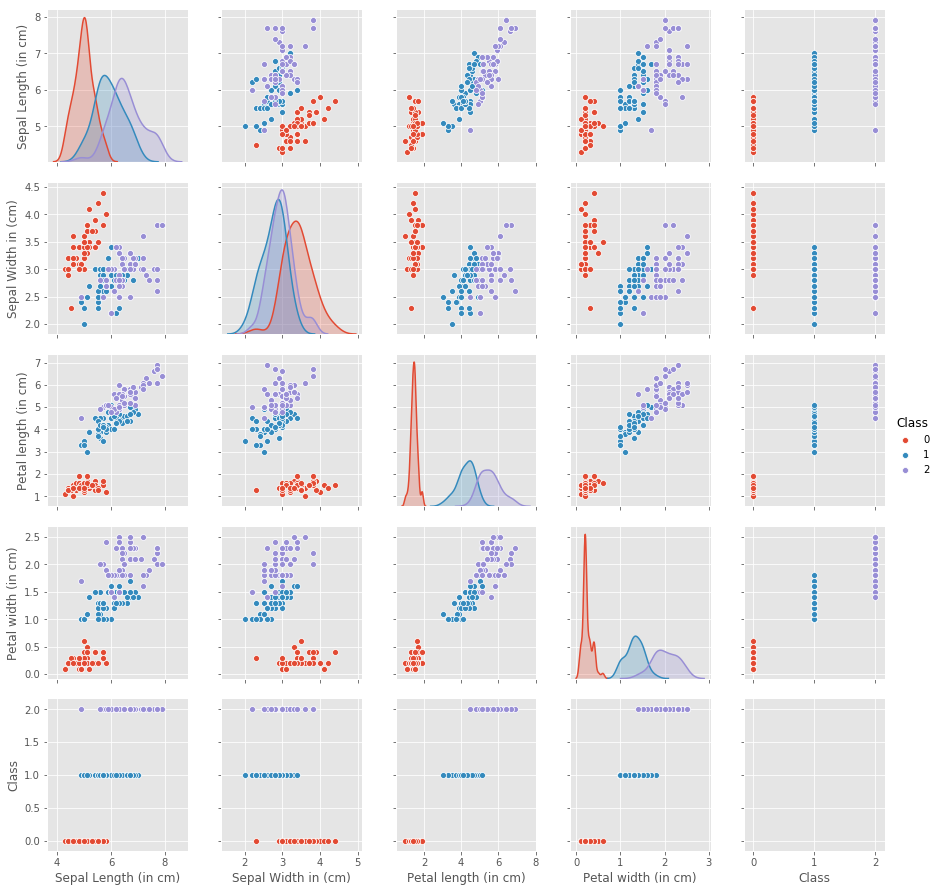

In [44]:
sns.pairplot(iris_df,hue='Class')

## Observations ( Answer 4)
#### Petal Length & petal width are highly correlated with our dependent variable (i.e class or flower type )
#### Sepal length is -ve ly correlated with our class variable 

### There are no variables who have correlation in range -0.1 to 0.1 so no need to drop columns.

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [45]:
iris_df.var()

Sepal Length (in cm)    0.685694
Sepal Width in (cm)     0.188004
Petal length (in cm)    3.113179
Petal width (in cm)     0.582414
Class                   0.671141
dtype: float64

In [17]:
#Since all the variables have > 0.1 variance so no need to drop any columns.

## Question 6

*Plot the scatter matrix for all the variables.*

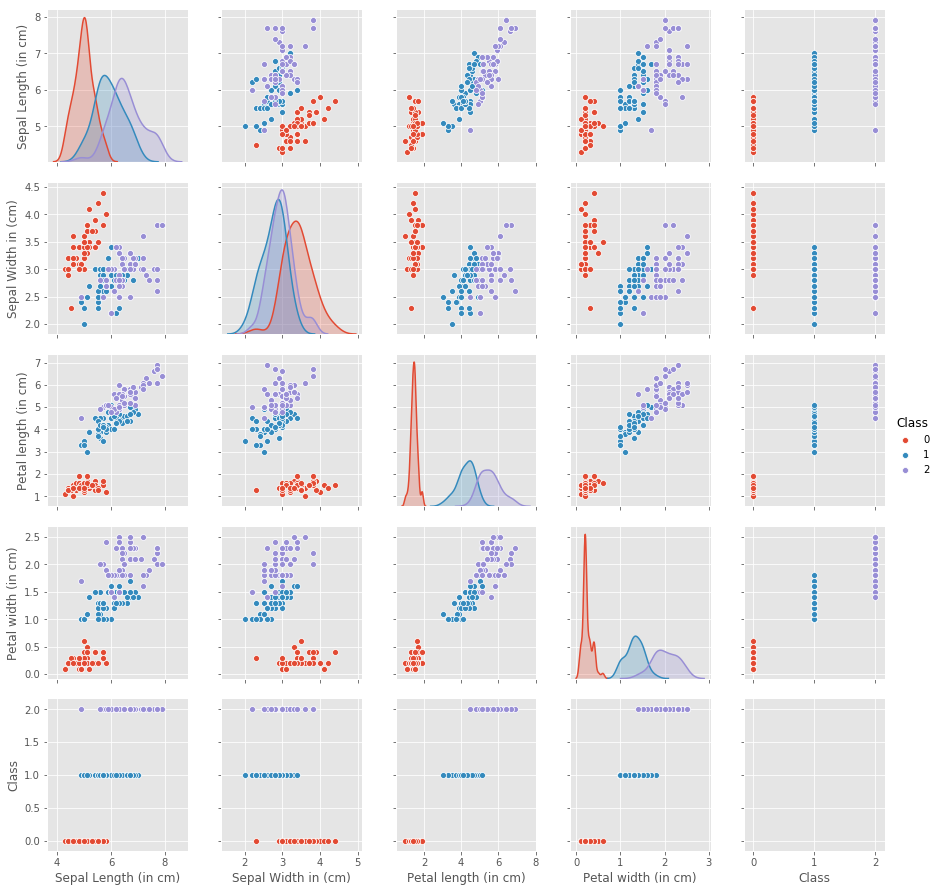

In [46]:
sns.pairplot(iris_df,hue='Class')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002514C0CF978>,
      dtype=object)

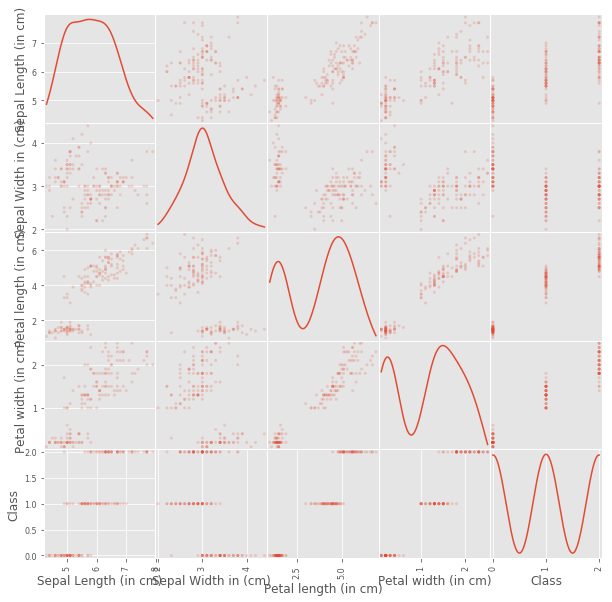

In [47]:
scatter_matrix(iris_df, alpha=0.2, figsize=(10, 10), diagonal='kde')

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [69]:
iris_df.sample(5)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
26,5.0,3.4,1.6,0.4,0
8,4.4,2.9,1.4,0.2,0
109,7.2,3.6,6.1,2.5,2
56,6.3,3.3,4.7,1.6,1
103,6.3,2.9,5.6,1.8,2


In [70]:
x_iris_df = iris_df.drop('Class',axis=1)
y_iris_df = iris_df['Class']

In [158]:
X_train, X_test, y_train, y_test = train_test_split(x_iris_df, y_iris_df, test_size=0.20, random_state=17)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [159]:
for k in [3,5,9]:
    classifier = KNeighborsClassifier(n_neighbors=k)  
    classifier.fit(X_train, y_train)
    print(classifier)
    y_pred = classifier.predict(X_test)  
    accuracy = accuracy_score(y_test, y_pred)
    print(' k= %d accuracy_score is %f '%(k,accuracy))
    print(classification_report(y_test, y_pred))  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')
 k= 3 accuracy_score is 0.966667 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
 k= 5 accuracy_score is 0.933333 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.85      1.00      0.92        11
           2       1.00      0.83      0.91        12


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [160]:
MSE= []
for k in range(1,20,2):
    classifier = KNeighborsClassifier(n_neighbors=k)  
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)  
    error  = ( 1- accuracy_score(y_test, y_pred))
    print(' k= %d error is %f '%(k,error))
    MSE.append(error)

 k= 1 error is 0.033333 
 k= 3 error is 0.033333 
 k= 5 error is 0.066667 
 k= 7 error is 0.100000 
 k= 9 error is 0.100000 
 k= 11 error is 0.066667 
 k= 13 error is 0.066667 
 k= 15 error is 0.033333 
 k= 17 error is 0.100000 
 k= 19 error is 0.100000 


In [103]:
# Minimum value of K with lowest error is k=1 & K=3 

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

Text(0, 0.5, 'Mean Error')

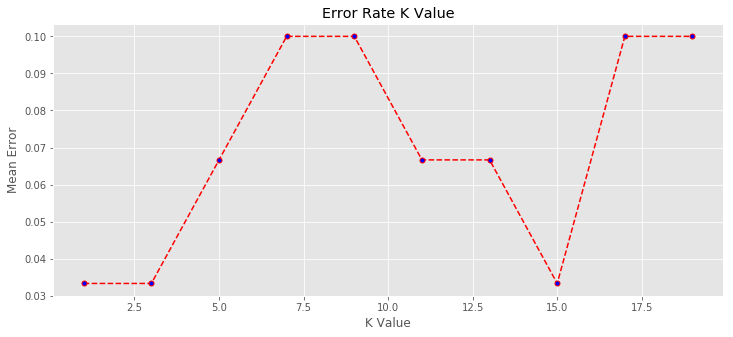

In [161]:
plt.figure(figsize=(12,5))
plt.plot(range(1,20,2), MSE, color='red', linestyle='dashed', marker='.',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

# Naive Bayes with Iris Data

In [133]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA


In [134]:
iris = datasets.load_iris()

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [147]:
iris_data_frame=pd.DataFrame(iris['data'],columns=['Sepal Length','Sepal Width','Petal length','Petal Width'])
iris_data_frame['Species']=iris['target']
y=iris_data_frame['Species']
x=iris_data_frame.drop('Species',axis=1)
iris_data_frame.head(2)


,Sepal Length,Sepal Width,Petal length,Petal Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [187]:
iris_data_frame.shape

(150, 5)

In [150]:
#Check the dataset
print(y)
print(X)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

Text(0, 0.5, 'Count')

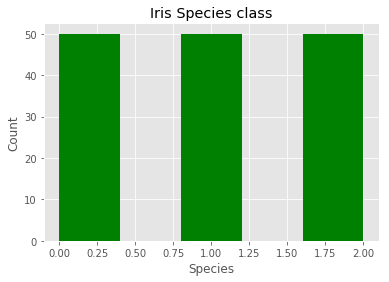

In [156]:
plt.hist(y, bins = 5, color = "green") 
plt.title("Iris Species class") 
plt.xlabel("Species") 
plt.ylabel("Count") 

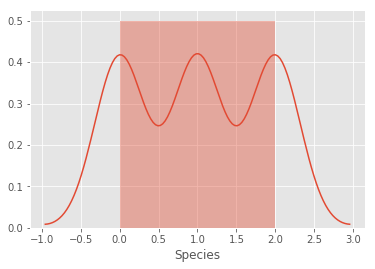

In [126]:
sns.distplot(y);

In [ ]:
#Drop Id variable from data

### Question 12 
Find Correlation among all variables and give your insights 

In [ ]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [157]:
iris_data_frame.corr()

,Sepal Length,Sepal Width,Petal length,Petal Width,Species
Sepal Length,1.000000,-0.117570,0.871754,0.817941,0.782561
Sepal Width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
Petal length,0.871754,-0.428440,1.000000,0.962865,0.949035
Petal Width,0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.782561,-0.426658,0.949035,0.956547,1.000000


#### Observations ( Answer 4)
>  Petal Length & petal width are highly correlated with our dependent variable (i.e class or flower type )
<br>  Sepal length is -ve ly correlated with our class variable

### Split data in Training and test set in 80:20.

In [258]:
X_train, X_test, y_train, y_test = train_test_split(x_iris_df, y_iris_df, test_size=0.20, random_state=8)

### Question 13 
Do Feature Scaling 

In [259]:
# Use StandardScaler or similar methods
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [260]:
X_train_scaled = scaler.fit_transform(X_train)

### Question 14 
Train and Fit NaiveBayes Model

In [261]:
#Fit the model
from sklearn.naive_bayes import GaussianNB

clf_GNB = GaussianNB()
clf_GNB = clf_GNB.fit(X_train_scaled, y_train)

In [262]:
#Predict
X_test_scaled = scaler.fit_transform(X_test)
y_pred_GNB=clf_GNB.predict(X_test_scaled)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [265]:
# show Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred_GNB)
confusion_matrix

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  2,  9]], dtype=int64)

In [266]:
# show accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_GNB)

0.9

## Precision and Recall metrics
> The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives
<br><br>
>The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives.

In [267]:
#Show precision and Recall metrics
from sklearn.metrics import recall_score, precision_score
recall_score(y_test, y_pred_GNB, average=None)

array([1.        , 0.88888889, 0.81818182])

In [268]:
precision_score(y_test, y_pred_GNB, average=None)

array([1. , 0.8, 0.9])

In [269]:
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ 0 10]
 [ 1  9]
 [ 2 11]]


In [270]:
unique, counts = np.unique(y_pred_GNB, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ 0 10]
 [ 1 10]
 [ 2 10]]
